In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

measure = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.

latest_date = session.query(measure.date).order_by(measure.date.desc()).first()[0]

latest_date

'2017-08-23'

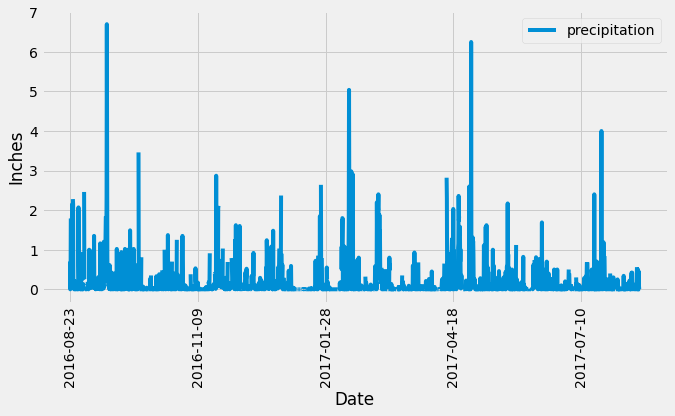

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

query_date = pd.to_datetime(latest_date) - dt.timedelta(days=365)
query_date_string = query_date.strftime("%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores

precip_data = session.query(measure.date, measure.prcp).\
               filter(measure.date >= query_date_string).\
               order_by(measure.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

precip_df = pd.DataFrame(precip_data, columns= ['date', 'prcp'])

precip_df.set_index('date', inplace=True)

plt.setp(ax.get_xticklabels(), rotation=90)

# Sort the dataframe by date

precip_df.sort_values(by='date', ascending=True, inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data


fig, ax = plt.subplots(figsize=(10, 5))
precip_df.plot(ax=ax)
ax.legend(["precipitation"])

plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()


In [66]:
# Use Pandas to calcualte the summary statistics for the precipitation data

summary = print(precip_df.describe())

summary

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [67]:
# Design a query to calculate the total number stations in the dataset

total_stations = session.query(func.count(station.name)).scalar()

total_stations

9

In [68]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

tobs_count = session.query(measure.station, func.count(measure.tobs)).\
                            group_by(measure.station).\
                            order_by(func.count(measure.tobs).desc()).all()

tobs_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [69]:
# List which station id has the greatest number of observations

top_station = tobs_count[0]

top_station

('USC00519281', 2772)

In [73]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

results = (session.query(func.min(measure.tobs), func.max(measure.tobs), func.avg(measure.tobs))
                .filter(measure.station == 'USC00519281')
                .all())

for result in results:
    print(f'Lowest: {result[0]}, Highest: {result[1]}, Average: {result[2]}')


Lowest: 54.0, Highest: 85.0, Average: 71.66378066378067


In [81]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


station_data = session.query(measure.date, measure.tobs).filter(measure.station == 'USC00519281').filter(measure.date >= query_date_string).all()


In [82]:
station_df = pd.DataFrame(station_data, columns=['date', 'tobs'])

station_df.set_index('date', inplace=True)

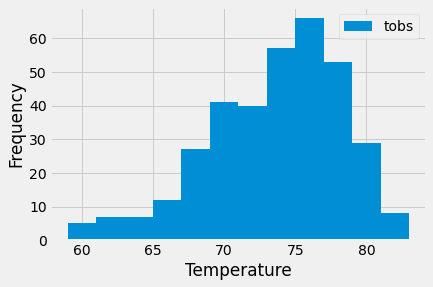

In [83]:
station_df.plot.hist(bins=12)

plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

# Close session

In [84]:
# Close Session
session.close()